In [1]:
import os
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'Text/männlich'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_m = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_m += file.read() + '\n'

In [3]:
#corpora_m

In [4]:
# Definiere eine Stoppliste
stopwords = set(["ach", "wer", "was", "dich", "wo", "xxx", "haben", "mich", "1.", "3", "2", "daselbst", "welcher", "denn", "ab", "he", "alle", "dieser", "aus", "kein", "da", "man", "so", "werden", "bis", "ohne", "wie", "mein", "wenn", "also", "dazu", "davon", "um", "doch", "ihn", "solcher", "ein", "dahin", "vor", "Hen", "hier", "aller", "nur", "der", "die", "das", "und", "--", "eine", "1.", "für", "in", "zu", "mit", "von", "auf", "daß", "dass", "sich", "nicht", "es", "an", "als", "auch", "nach", "bei", "hen", "über", "dies", "durch", "noch", "gegen", "sein", "des", "sowie", "zum", "im", "mehr", "bereits", "aber", "hat", "dem", "am"])

In [5]:
# Load the German model
nlp = spacy.load("de_core_news_sm")

In [6]:
# Verarbeite den bereinigten Text mit spaCy
doc_m = nlp(corpora_m)

In [7]:
# Extrahiere die Lemmata und filtere Stopwörter
lemmata_m = [token.lemma_.lower() for token in doc_m if token.lemma_.lower() not in stopwords]

In [8]:
lemmata_freq_m = Counter(lemmata_m)

In [9]:
sorted_lemmata_freq_m={lemma: freq for lemma, freq in lemmata_freq_m.items() if freq > 3}

In [10]:
def couleur(*args, **kwargs):
    import random
    return "rgb(0, 100, {})".format(random.randint(100, 255))

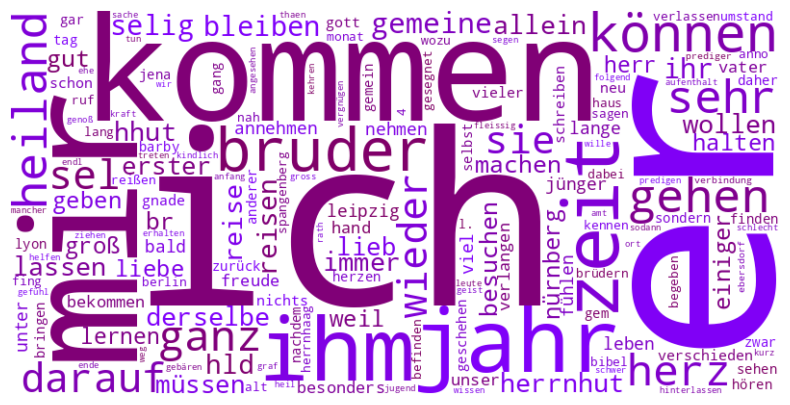

In [31]:
# Erstelle eine Word Cloud
wordcloud_m = WordCloud(width=800, height=400, background_color='white', color_func = couleur).generate_from_frequencies(sorted_lemmata_freq_m)

# Zeige die Word Cloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_m, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_m.png')
plt.show()

In [12]:
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'Text/weiblich'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_w = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_w += file.read() + '\n'

In [13]:
# Verarbeite den bereinigten Text mit spaCy
doc_w = nlp(corpora_w)

In [14]:
# Extrahiere die Lemmata und filtere Stopwörter
lemmata_w = [token.lemma_.lower() for token in doc_w if token.lemma_.lower() not in stopwords]

In [15]:
lemmata_freq_w = Counter(lemmata_w)

In [16]:
# Behalte nur die Lemmata, die mehr als einmal vorkommen
filtered_lemmata_freq_w = {lemma: freq for lemma, freq in lemmata_freq_w.items() if freq > 3}

In [17]:
def couleur(*args, **kwargs):
    import random
    return "rgb(128, 0, {})".format(random.randint(100, 255))

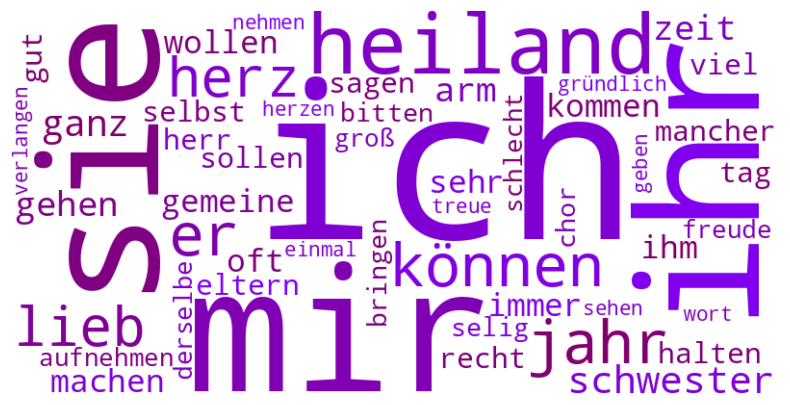

In [30]:
# Erstelle eine Word Cloud
wordcloud_w = WordCloud(width=800, height=400, background_color='white', color_func = couleur).generate_from_frequencies(filtered_lemmata_freq_w)

# Zeige die Word Cloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_w, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_w.png')
plt.show()

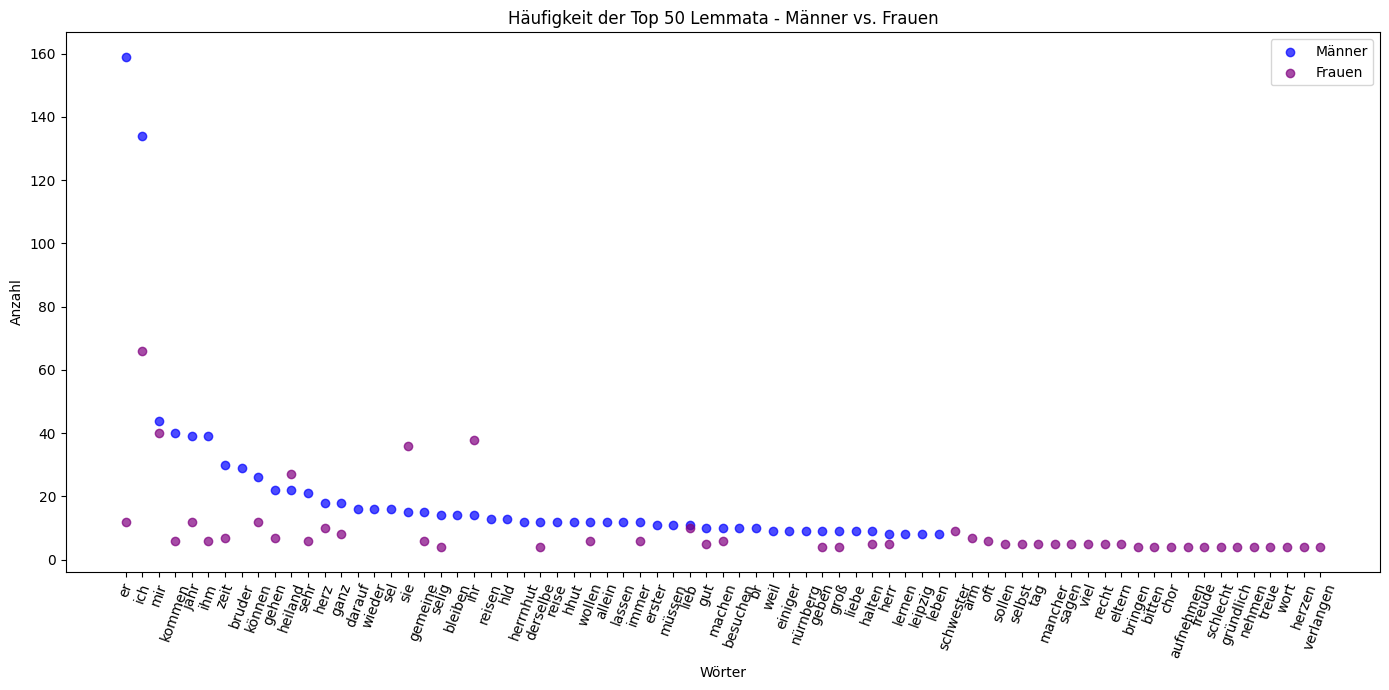

In [29]:
# Funktion zum Sortieren und Auswählen der Top 20 Wörter
def get_top_20_words(freq_dict):
    sorted_items = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)
    top_20_items = sorted_items[:50]
    words, frequencies = zip(*top_20_items)
    return words, frequencies

# Erhalte die Top 20 Wörter für Männer und Frauen
words_m, frequencies_m = get_top_20_words(sorted_lemmata_freq_m)
words_w, frequencies_w = get_top_20_words(filtered_lemmata_freq_w)

# Erstelle das Punktediagramm
plt.figure(figsize=(14, 7))

plt.scatter(words_m, frequencies_m, color='blue', label='Männer', alpha=0.7)
plt.scatter(words_w, frequencies_w, color='purple', label='Frauen', alpha=0.7)

plt.xlabel('Wörter')
plt.ylabel('Anzahl')
plt.title('Häufigkeit der Top 50 Lemmata - Männer vs. Frauen')
plt.xticks(rotation=70)
plt.legend()

plt.tight_layout()
plt.savefig('grafik.png')
plt.show()